##  Interpolation and Scipy.Interpolate

Given a function or relationship defined by a series of points - (x0,y0), (x1,y1), . . . . .(xn,yn) - there are many different techniques for estimating values of that function at other points.  If the estimation point is between definition points we have **interpolation**.   If it is beyond the range of the definition points it is **extrapolation**.

The technique we will discuss here is called Lagrange Interpolation. The best way to see how it works is to take the simple case of a straight line estimate between two points - (x0,y0) and (x1,y1).  The value at some x using the straight line between the points to describe the function will just be -
$$y(x)=y_0 + \frac{y_1-y_0}{x_1-x_0} (x-x_0)$$
The fraction in the second term on the RHS is just the slope of the line between the two points.  We can group RHS terms together by performing some simple algebra - 
\begin{align}
y(x) & = y_0 + \frac{y_1-y_0}{x_1-x_0} (x-x_0) \\
     & = \frac{x_0-x_1}{x_0-x_1} y_0 + \frac{y_1-y_0}{x_1-x_0} (x-x_0) \\
     & = \frac{x-x_1}{x_0-x_1} y_0 + \frac{x-x_0}{x_1-x_0} y_1\\ 
\end{align}
You can see that this fits our straight line criterion as it is linear in x and takes the values $y_0$ at $x_0$ and $y_1$ at $x_1$.

This form of the straight line formula gives a hint of the structure required for using more points to develop a higher-order polynomial.  We want a nth degree polynomial that uses n+1 points.   It must go through the given $(x_i,y_i)$ data points which is ensured by using the following set of **basis functions**-
\begin{align}
L_{n,k}(x_j) & = 1\ \ \ k=j \\
             & = 0\ \ \ k\neq j
\end{align}
With this definition in place, our polynomial is defined as -
$$L(x) = \sum_{k=0}^{n}y_k L_{n,k}(x)$$

We create the $L_{n,k}(x_j)$ in a manner similar to the equations shown above.  We need the basis functions to be nth degree, so it requires the product of n factors of the form (x-$x_k$) that are zero if we use an $x_k$ value.  The denominator needs to be a similar product of factors, that provide cancellation of the numerator (ratio of 1).  

For instance, for n=2 and three relevant points, we would have - 
\begin{align}
L_{2,0}(x) & = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}\\
L_{2,1}(x) & = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}\\
L_{2,2}(x) & = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align}

Let us look at a simple python example of this for the three points (0.,0.5), (1.0,0.85), (2.0, 0.1)-

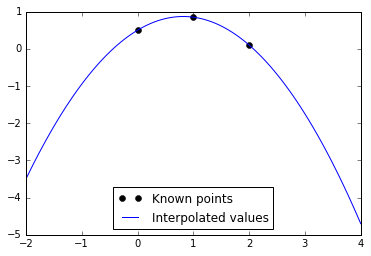

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
xpts=[0.0,1.0,2.0]
ypts=[0.5,0.85,0.1]

def mylag(x) :
    term1= ypts[0]*(x-xpts[1])*(x-xpts[2])/(xpts[0]-xpts[1])/(xpts[0]-xpts[2]) 
    term2= ypts[1]*(x-xpts[0])*(x-xpts[2])/(xpts[1]-xpts[0])/(xpts[1]-xpts[2]) 
    term3= ypts[2]*(x-xpts[0])*(x-xpts[1])/(xpts[2]-xpts[0])/(xpts[2]-xpts[1]) 
    return term1+term2+term3

xarr = np.linspace(-2, 4, 100)  #values at which we will calculate our function
yarr = mylag(xarr)
plt.plot(xpts, ypts, 'ok',label='Known points')
plt.plot(xarr, yarr, label='Interpolated values')
plt.legend(loc=8)
plt.show()

Note that this is not the same as **fitting a line**. We are merely constructing a function that is guaranteed to hit the known points.

Constructing these polynomials is tedious and prone to error.  Fortunately, as with many algorithms, Python provides a package routine that will create a Lagrange polynomial of a certain order given a set of input points.  This is the **lagrange** function from the scipy.interpolate library. 

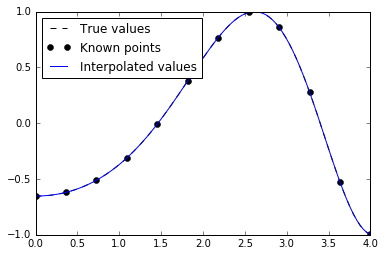

In [13]:
%matplotlib inline
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

#calculate the function at a few representative points
xpts = np.linspace(0, 4, 12)
ypts = np.cos(x**2/3+4)

#calculate the actual function values in the interval
xact = np.linspace(0, 4, 100)
yact = np.cos(xn**2/3+4)

#calculate the lagrange interpolating function
ylag = interp.lagrange( xpts, ypts)
yinterp = ylag(xact)

plt.plot(xact, yact, '--k', label='True values')
plt.plot(xpts, ypts, 'ok', label='Known points')
plt.plot(xact, yinterp, label='Interpolated values')
plt.legend(loc=2)
plt.show()

There are several important things to note here.  First is that the scipy.interpolate.lagrange function is described as being unstable for a large number of input points.  

Secondly, while the Lagrange polynomials are theoretically useful, they are not that widely used in practical interpolation.  There are several other interpolation schemes that are much more commonly used.  For instance, without proof or much exposition we will mention **cubic splines**.

For n+1 input points, this method creates essentially n third order polynomials between adjacent points. Cubic splines have the following characteristics (S is the spline function) - 

- $S(x) = S_k(x) = S_{k,0} + S_{k,1}(x-x_k) +S_{k,2}(x-x_k)^2  +S_{k,3}(x-x_k)^3$   
    for  $x_k\leq x \leq x_{k+1}$ and k=0:n-1
- $S_k(x_k) =  y_k$ for k=0:n (passes through each point)
- $S_k(x_{k+1}) = S_{k+1}(x_{k+1}) = y_{k+1}$ for k=0:n-2 (adjacent functions continuous)
- $S'_k(x_{k+1})=S'_{k+1}(x_{k+1})$ for k=0:n-2 (first derivative continuous)
- $S''_k(x_{k+1})=S''_{k+1}(x_{k+1})$ for k=0:n-2 (second derivative continuous)

In the 1D case, scipy.interpolate provides the interp1d function.  This function has many options, one of which is the "kind" parameter which chooses the kind of interpolating polynomial.    The default is a straight line between adjacent points, but the "cubic" option is a cubic spline.

Below is an example of this interpolating function which is our recommended interpolation method - 

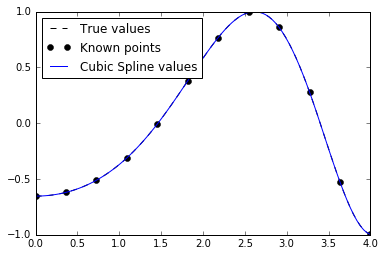

In [17]:
%matplotlib inline
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt

#calculate the function at a few representative points
xpts = np.linspace(0, 4, 12)
ypts = np.cos(x**2/3+4)

#calculate the actual function values in the interval
xact = np.linspace(0, 4, 100)
yact = np.cos(xn**2/3+4)

#calculate the interp1d interpolating function choosing cubic option
ylag = interp.interp1d( xpts, ypts, kind='cubic')
yinterp = ylag(xact)

plt.plot(xact, yact, '--k', label='True values')
plt.plot(xpts, ypts, 'ok', label='Known points')
plt.plot(xact, yinterp, label='Cubic Spline values')
plt.legend(loc=2)
plt.show()

## Predictor-Corrector ODE Solver and Scipy.odeint

Our last word on ordinary differential equations is to mention the default solver in the Python Scipy package - **odeint**.  This solver is based on a well-known solver used in other languages called **LSODA**.  

LSODA has a sophisticated set of inputs that allow the algorithms to figure out what is going on with the solution locally, and adjust parameters or approaches accordingly.  This is an advantage of packaged routines over a roll-your-own approach.  Sometimes one may have to code their own solver, but for a limited use it is unlikely that you would include all the bells and whistles that are available with an established, well-tested, package of routines.

The core of LSODA is called the **Adams Predictor-Corrector** method.   You may also see references to Adams-Bashforth-Moulton.  This is a $O(h^5)$ step error solver with the ability to determine the local errors and adapt accordingly.

This approach is a **multi-step solver** in that it uses several previously determined points to propagate the solution forward over the new interval.  RK solvers are examples of **single-step solvers**.  

Fundamentally, what the Adams approach does is calculate a Lagrange polynomial representation of the derivative function,  e.g. f(t,y(t)),  using several previous values of the derivative function and then integrate this over the new interval.  This is the **predictor**.  

A new value of the derivative function is now available that is used in a new Lagrange polynomial.  Integrating this over the interval results in the **corrector**.  The difference between the two is actually $O(h^6)$ and so provides an excellent local error estimate.  **See the handout on Piazza** for a fuller explanation.

With this hasty introduction, we will now use odeint as a solver for our damped harmonic oscillator problem - 

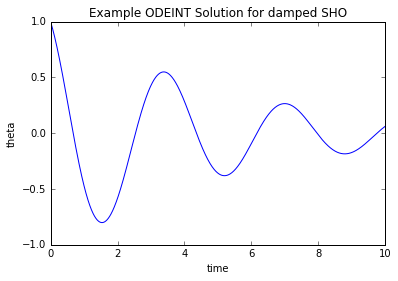

In [35]:
%matplotlib inline
import numpy as np
import scipy.integrate as sciint
import matplotlib.pyplot as plt

def myderivs(r,t):
    omegasqr=np.sqrt(9.8/1.0)
    beta=0.2
    theta=r[0]
    omega=r[1]
    dtheta = omega
    domega=-2*beta*omega -omegasqr*np.sin(theta)
    return np.array([dtheta,domega],float)

#g=9.8
#L=1.0
#omegasqr=g/L
#beta=0.29

#create the array of time values and (empty) x-values, and loop over 
#all times supplementing x each time    
times = np.linspace(0.0,10.0,1000)
initvals = np.array([1.0,-1.0]) # initial values
dhosol = sciint.odeint(myderivs,initvals,times)

plt.plot(times,dhosol[:,0],label='theta')
#plt.plot(tpoints,omegapts,label='omega')
#plt.plot(thetapts,omegapts,label='phase space')

plt.title("Example ODEINT Solution for damped SHO")
plt.xlabel("time")
plt.ylabel("theta")
#plt.legend(loc='upper right')
#plt.ylabel("x(t)")
plt.show()

In [34]:
dhosol.shape

(1000, 2)

In [31]:
times

array([ 0.])